# Propagating uncertainties in fluid inclusion barometry
- This notebook shows how to propagate uncertainty when performing fluid inclusion barometry

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.77'

### Load in the data

In [2]:
df=pd.read_excel('Fluid_Inclusion_Densities_Example1.xlsx', sheet_name='Diff_Temps')
df.head()

,Sample,Density_g_cm3,T_C,Host_Fo_content
0,FI1,0.436888,1048.898738,0.897797
1,FI2,0.417796,1015.924767,0.831850
2,FI4,0.459045,1041.589916,0.883180
3,FI5,0.493865,1034.935183,0.869870
4,FI7,0.482227,1034.820102,0.869640


## Propagating uncertainty in temperature
- Lets say the uncertainty in temperature is +-50K. So this is an absolute error, and we want temperature distributed normally
- We want to use a single step profile initially to convert pressure to depth
- We want to make 1000 duplicates per FI with temperature varying by 1 sigma=50K
- It outputs MC_Av, which is the average for each fluid inclusion, and MC_All, which contains rows for each of the N duplicates you asked for appended end-on-end

### Lets do a silly example first just using a single FI so you can see what its doing
- If you use plot_figure=True, it will plot the resulting distributions. 

working on sample number 0
working on sample number 20


,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,std_dev_MC_D_km_from_percentile,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,FI1,0.436888,5.920228,1.568091,1.573203,1.574870,0.067878,0.067580,5.939528,5.945821,0.256270,0.255144,50,0,0.0,1322.048738,0.436888,None,2700,SW96
1,FI2,0.417796,5.382509,1.425665,1.425509,1.425057,0.064152,0.063603,5.381921,5.380211,0.242204,0.240131,50,0,0.0,1289.074767,0.417796,None,2700,SW96
2,FI4,0.459045,6.337844,1.678705,1.675856,1.676702,0.074689,0.075400,6.327087,6.330282,0.281982,0.284667,50,0,0.0,1314.739916,0.459045,None,2700,SW96
3,FI5,0.493865,7.059130,1.869752,1.874865,1.875802,0.083029,0.082991,7.078434,7.081973,0.313471,0.313329,50,0,0.0,1308.085183,0.493865,None,2700,SW96
4,FI7,0.482227,6.798232,1.800648,1.801349,1.801034,0.081924,0.084273,6.800880,6.799691,0.309300,0.318169,50,0,0.0,1307.970102,0.482227,None,2700,SW96


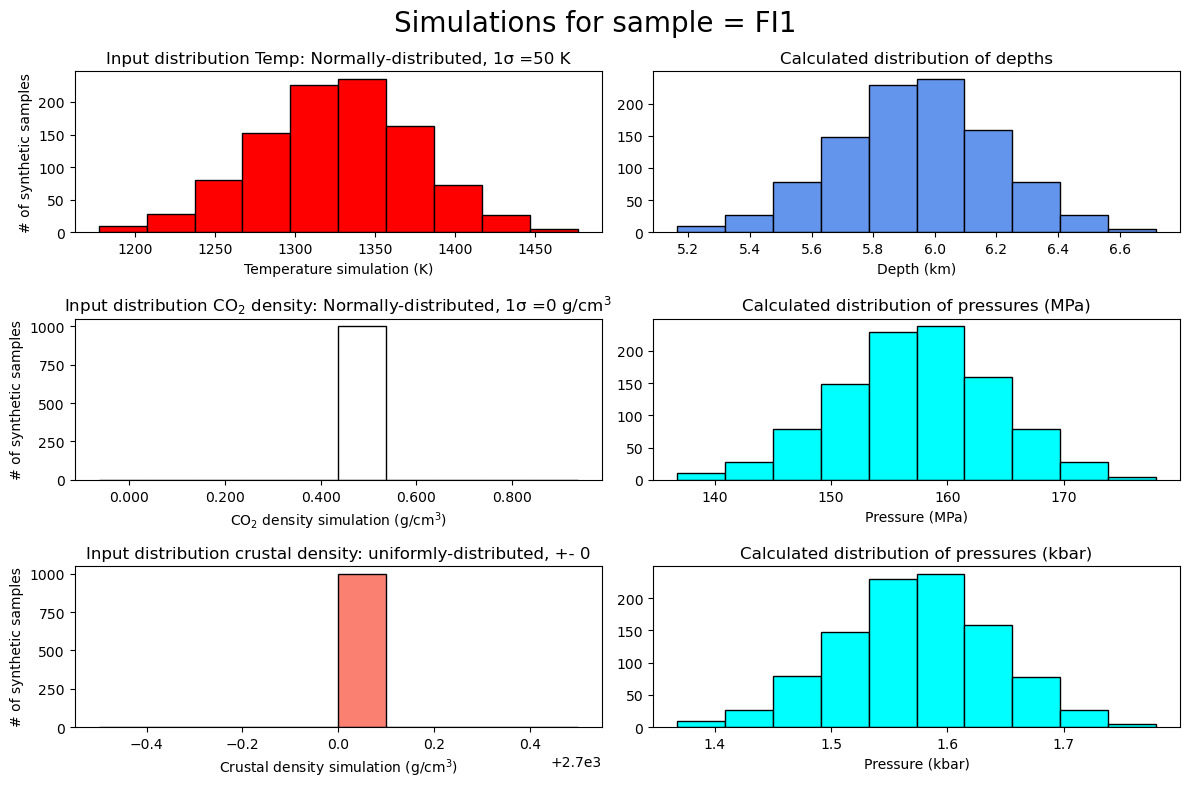

In [3]:
MC_Av_Tonly, MC_All_Tonly, fig=pf.propagate_FI_uncertainty(T_K=df['T_C']+273.15,
error_T_K=50, error_type_T_K='Abs', error_dist_T_K='normal',
                        CO2_dens_gcm3=df['Density_g_cm3'],
                        sample_ID=df['Sample'],
                        crust_dens_kgm3=2700,
                        N_dup=1000, fig_i=0, plot_figure=True)
MC_Av_Tonly.head()

### Plot each FI and its 1 sigma error
-  Lets plot the pressure of the inputted FI (SingleFI_P_kbar), and then the standard deviation of the MC simulation against the Fo content

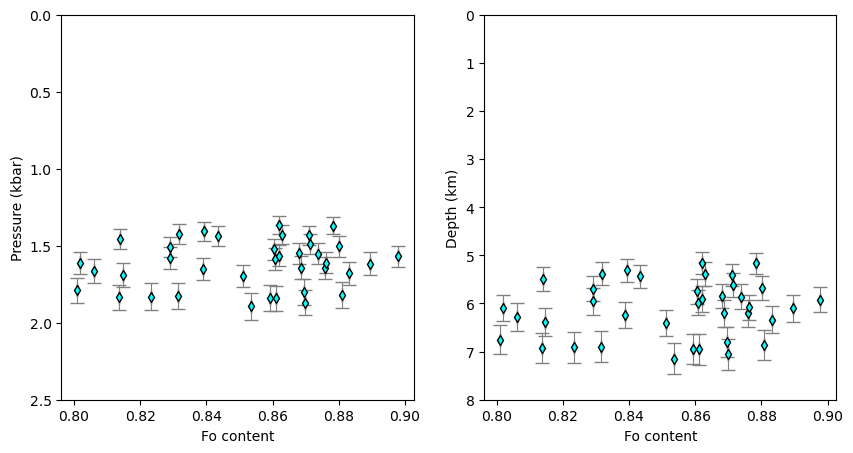

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_P_kbar'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_P_kbar'],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=5)

ax1.set_xlabel('Fo content')
ax1.set_ylabel('Pressure (kbar)')

ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_D_km'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_D_km'],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=5)
ax2.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')


ax1.set_ylim([0, 2.5])
ax2.set_ylim([0, 8])
ax1.invert_yaxis()
ax2.invert_yaxis()

## Propagating uncertainty in CO$_2$ Density
- Lets say the uncertainty in CO$_2$ density is +-10%, in reality, this will vary greatly between instruments, as well with the absolute density (e.g. more like +-20% for the very weakest diads, more like +-5% for the densest).

working on sample number 0
working on sample number 20


,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,std_dev_MC_D_km_from_percentile,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,FI1,0.436888,5.920228,1.568091,1.570329,1.562783,0.233280,0.227669,5.928679,5.900188,0.880734,0.859552,0,10,0.0,1322.048738,0.436888,None,2700,SW96
1,FI2,0.417796,5.382509,1.425665,1.424157,1.406612,0.218168,0.200806,5.376814,5.310576,0.823679,0.758132,0,10,0.0,1289.074767,0.417796,None,2700,SW96
2,FI4,0.459045,6.337844,1.678705,1.688911,1.669764,0.254651,0.244461,6.376377,6.304090,0.961417,0.922946,0,10,0.0,1314.739916,0.459045,None,2700,SW96
3,FI5,0.493865,7.059130,1.869752,1.875474,1.853050,0.308763,0.289121,7.080734,6.996075,1.165716,1.091558,0,10,0.0,1308.085183,0.493865,None,2700,SW96
4,FI7,0.482227,6.798232,1.800648,1.802645,1.780863,0.296514,0.279988,6.805773,6.723534,1.119468,1.057079,0,10,0.0,1307.970102,0.482227,None,2700,SW96


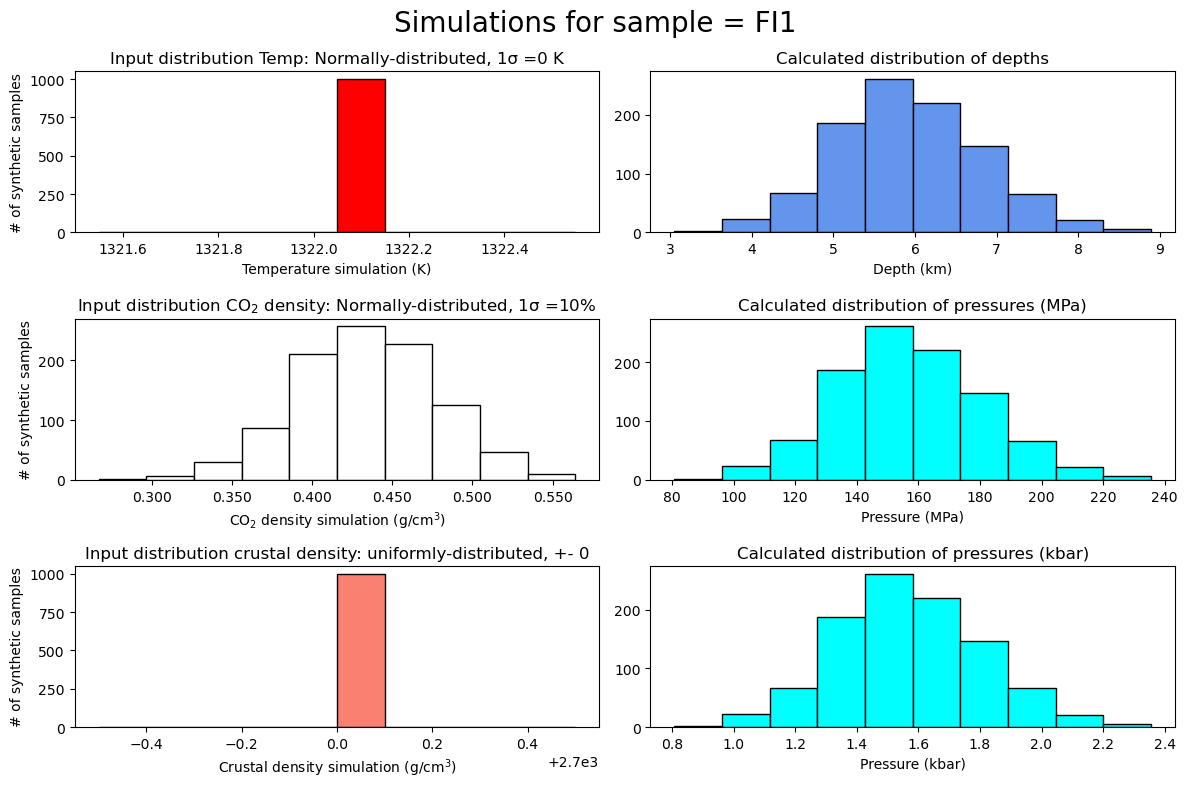

In [5]:
MC_Av_rhoonly, MC_All_rhoonly, fig=pf.propagate_FI_uncertainty(T_K=df['T_C']+273.15,
error_CO2_dens=10, error_type_CO2_dens='Perc', error_dist_CO2_dens='normal',
                        CO2_dens_gcm3=df['Density_g_cm3'],
                        sample_ID=df['Sample'],
                        crust_dens_kgm3=2700,
                        N_dup=1000, fig_i=0, plot_figure=True)
MC_Av_rhoonly.head()

## Simulation varying both temperature and CO$_2$ density
- Lets say you think you have +-30K uncertainty in temp, and +-0.02 g/cm3 in density

working on sample number 0
working on sample number 20


,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,std_dev_MC_D_km_from_percentile,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,FI1,0.436888,5.920228,1.568091,1.569091,1.561831,0.118477,0.115740,5.924004,5.896595,0.447302,0.436969,30,0.02,0.0,1322.048738,0.436888,None,2700,SW96
1,FI2,0.417796,5.382509,1.425665,1.430404,1.426002,0.105629,0.102211,5.400402,5.383780,0.398795,0.385891,30,0.02,0.0,1289.074767,0.417796,None,2700,SW96
2,FI4,0.459045,6.337844,1.678705,1.682975,1.676057,0.115041,0.115344,6.353967,6.327848,0.434330,0.435472,30,0.02,0.0,1314.739916,0.459045,None,2700,SW96
3,FI5,0.493865,7.059130,1.869752,1.864916,1.863977,0.132528,0.129231,7.040874,7.037327,0.500352,0.487905,30,0.02,0.0,1308.085183,0.493865,None,2700,SW96
4,FI7,0.482227,6.798232,1.800648,1.801565,1.790440,0.129068,0.123896,6.801695,6.759693,0.487287,0.467763,30,0.02,0.0,1307.970102,0.482227,None,2700,SW96


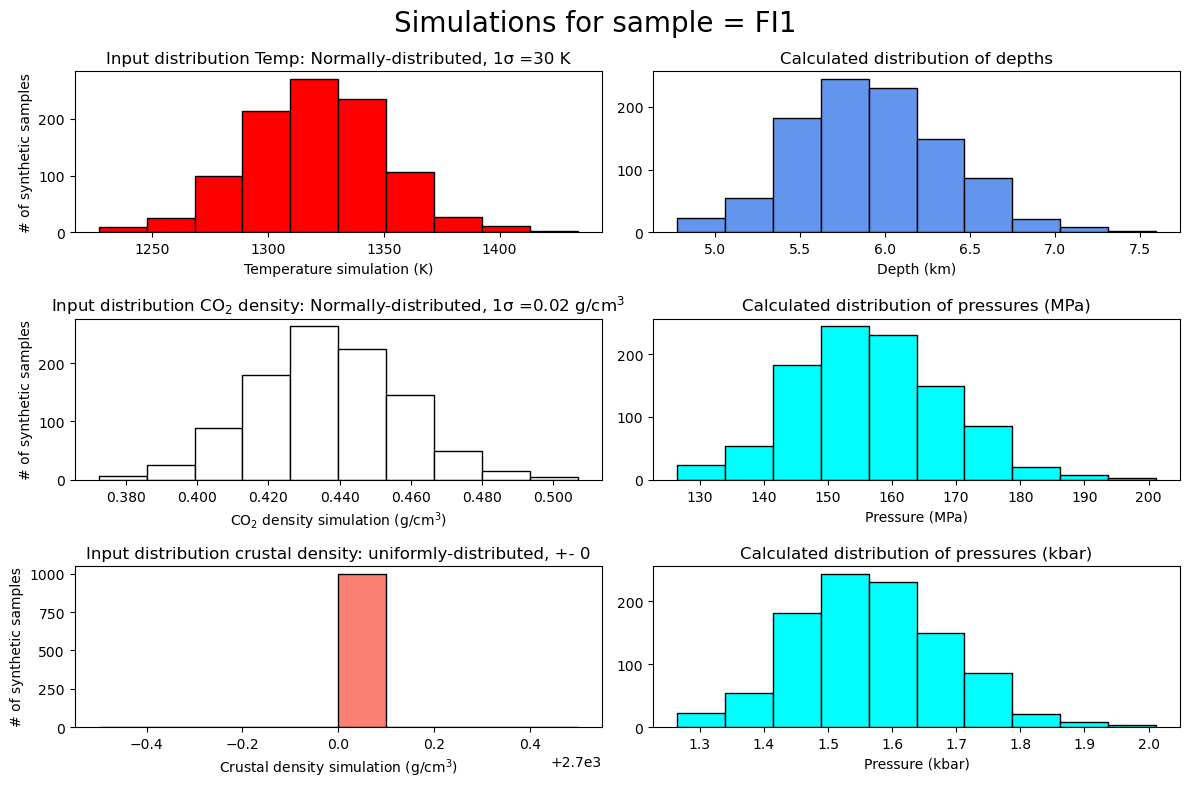

In [6]:
MC_Av_rho_T, MC_All_rho_T, fig=pf.propagate_FI_uncertainty(
T_K=df['T_C']+273.15,
error_CO2_dens=0.02, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=30, error_type_T_K='Abs', error_dist_T_K='normal',
CO2_dens_gcm3=df['Density_g_cm3'],
sample_ID=df['Sample'],
crust_dens_kgm3=2700,
N_dup=1000, fig_i=0, plot_figure=True)
MC_Av_rho_T.head()

## Uncertainty in Temp, CO$_2$ and Crustal density
- Here we also add a 5% uncertainty in crustal density.

working on sample number 0
working on sample number 20


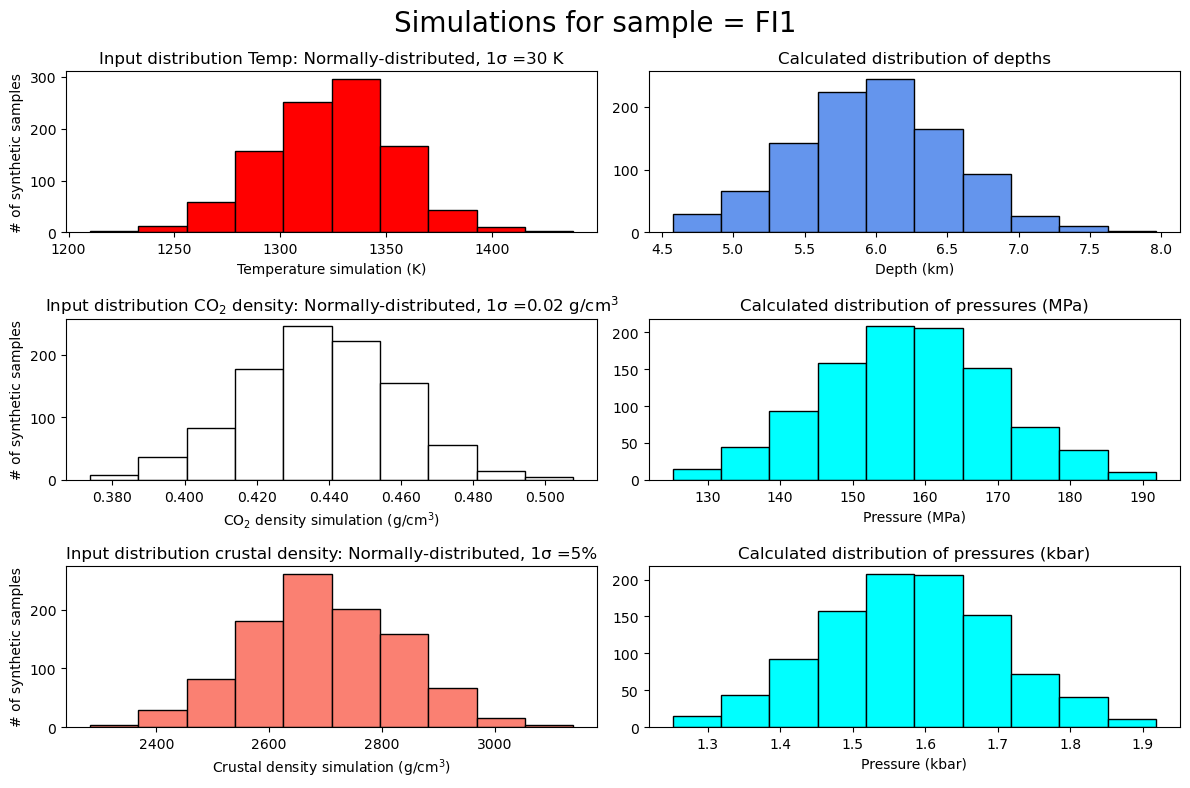

In [7]:
MC_Av_rho_T_CD, MC_All_rho_T_CD, fig=pf.propagate_FI_uncertainty(T_K=df['T_C']+273.15,
error_CO2_dens=0.02, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=30, error_type_T_K='Abs', error_dist_T_K='normal',
crust_dens_kgm3=2700,
error_crust_dens=5, error_type_crust_dens='Perc', error_dist_crust_dens='normal',                                            
CO2_dens_gcm3=df['Density_g_cm3'],
sample_ID=df['Sample'],
N_dup=1000, fig_i=0, plot_figure=True )
MC_Av_rho_T_CD.head()

fig.savefig('MonteCarlo_Sample1_png', dpi=300)

In [8]:
MC_All_rho_T_CD.head()

,Filename,Pressure (kbar),Pressure (MPa),Depth (km),input_crust_dens_kgm3,model,MC_T_K,MC_CO2_dens_gcm3
0,FI1,1.659447,165.944684,6.501545,2601.823096,None,1375.005591,0.440202
1,FI1,1.527048,152.704843,5.636898,2761.490966,None,1325.325503,0.428315
2,FI1,1.429127,142.912745,5.461597,2667.364018,None,1327.128973,0.408871
3,FI1,1.421377,142.137702,5.242449,2763.796592,None,1240.265401,0.430010
4,FI1,1.435069,143.506919,5.158205,2835.993609,None,1265.414767,0.425933


In [9]:
MC_Av_rho_T_CD

,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,std_dev_MC_D_km_from_percentile,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,FI1,0.436888,5.920228,1.568091,1.580039,1.581574,0.121159,0.122596,5.984709,5.994083,0.547928,0.554995,30,0.02,135.0,1322.048738,0.436888,None,2700,SW96
1,FI2,0.417796,5.382509,1.425665,1.426640,1.420201,0.105928,0.101877,5.376272,5.342271,0.478711,0.481949,30,0.02,135.0,1289.074767,0.417796,None,2700,SW96
2,FI4,0.459045,6.337844,1.678705,1.677597,1.678989,0.116983,0.116494,6.349929,6.319825,0.552736,0.537257,30,0.02,135.0,1314.739916,0.459045,None,2700,SW96
3,FI5,0.493865,7.059130,1.869752,1.874133,1.868976,0.126827,0.125483,7.113433,7.106100,0.608154,0.627861,30,0.02,135.0,1308.085183,0.493865,None,2700,SW96
4,FI7,0.482227,6.798232,1.800648,1.801321,1.794411,0.131751,0.128561,6.798430,6.734266,0.619103,0.618603,30,0.02,135.0,1307.970102,0.482227,None,2700,SW96
5,FI9,0.490442,6.954312,1.841989,1.843482,1.838772,0.121413,0.122562,6.968241,6.965283,0.568342,0.549460,30,0.02,135.0,1303.661132,0.490442,None,2700,SW96
6,FI11,0.453781,6.207481,1.644175,1.647913,1.648519,0.123468,0.117928,6.240113,6.226741,0.579794,0.570910,30,0.02,135.0,1311.100560,0.453781,None,2700,SW96
7,FI13,0.491932,6.895131,1.826313,1.831453,1.824301,0.125627,0.125354,6.938336,6.922598,0.593139,0.579206,30,0.02,135.0,1288.892022,0.491932,None,2700,SW96
8,FI15,0.444918,5.985014,1.585251,1.580774,1.576141,0.111347,0.110393,5.972559,5.959592,0.519428,0.526594,30,0.02,135.0,1303.569940,0.444918,None,2700,SW96
9,FI17,0.496043,6.929894,1.835521,1.841691,1.838321,0.129570,0.130049,6.963731,6.953915,0.603369,0.615583,30,0.02,135.0,1279.968166,0.496043,None,2700,SW96


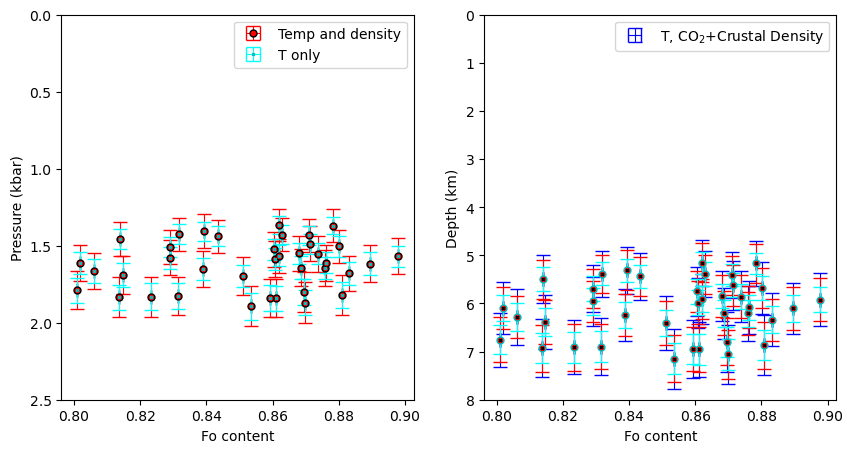

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))


ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_rho_T_CD['SingleFI_D_km'],
             xerr=0, yerr=MC_Av_rho_T_CD['std_dev_MC_D_km'],
             fmt='o', ecolor='b', elinewidth=0.8, mfc='b', ms=0, mec='b', capsize=5,
            label='T, CO$_2$+Crustal Density')
ax2.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')


ax1.errorbar(df['Host_Fo_content'], 
             MC_Av_rho_T['SingleFI_P_kbar'],
             xerr=0, yerr=MC_Av_rho_T['std_dev_MC_P_kbar'],
             fmt='o', ecolor='red', elinewidth=0.8, mfc='red', ms=5, mec='k', capsize=5,
             label='Temp and density')

ax1.set_xlabel('Fo content')
ax1.set_ylabel('Pressure (kbar)')

ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_rho_T['SingleFI_D_km'],
             xerr=0, yerr=MC_Av_rho_T['std_dev_MC_D_km'],
             fmt='o', ecolor='red', elinewidth=0.8, mfc='red', ms=5, mec='c', capsize=5)
ax2.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')


ax1.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_P_kbar'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_P_kbar'],
             fmt='x', ecolor='cyan', elinewidth=0.8, mfc='cyan', ms=2, mec='c', capsize=5,
            label='T only')

ax1.set_xlabel('Fo content')
ax1.set_ylabel('Pressure (kbar)')

ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleFI_D_km'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_D_km'],
             fmt='x', ecolor='cyan', elinewidth=0.8, mfc='cyan', ms=2, mec='k', capsize=5)
ax1.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')
ax2.legend()
ax1.legend()
ax1.set_ylim([0, 2.5])
ax2.set_ylim([0, 8])
ax1.invert_yaxis()
ax2.invert_yaxis()